In [10]:
#Bibliotecas usadas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

In [2]:
#Importando dataset 
#fonte: https://www.kaggle.com/sohier/calcofi
sltm = pd.read_csv('calco/bottle.csv')
sltm.head()

C:\Software\Eng_APPS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning:

Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.



,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Selecionando e renomeando as colunas que serão usadas.
sltm = sltm[['Salnty','T_degC']]
sltm.columns = ['Sal','Temp']


In [4]:
sltm.head()

,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [97]:
#Delimitando o tamanho do dataset
sltmn = sltm[:][:1000]

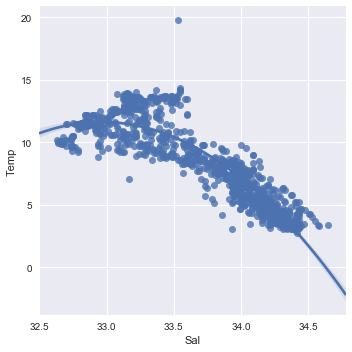

In [98]:
sns.lmplot(x='Sal', y='Temp', data=sltmn, order=2)

In [26]:
#Eliminando dados Missing
sltmn.fillna(method='ffill', inplace=True)

In [27]:
#Treinando o modelo
x = sltmn['Sal'].values.reshape(-1,1)
y = sltmn['Temp'].values.reshape(-1,1)

xtr, xts, ytr, yts = train_test_split(x, y, test_size = 0.2)

ln = LinearRegression()
ln.fit(xtr, ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Confirmando a divisão do dataset para 80% de treino e 20% de teste
xtr.shape, xts.shape

((800, 1), (200, 1))

In [29]:
ytr.shape, yts.shape

((800, 1), (200, 1))

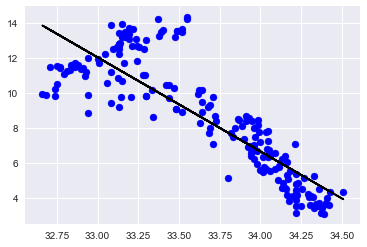

In [30]:
#Realizando a predição e plot dos resultados
yp = ln.predict(xts)
plt.scatter(xts,yts, color='b')
plt.plot(xts, yp, color='k')


In [100]:
#Gráfico de disperção com plotly
trace = go.Scatter(x=sltmn['Sal'], y=sltmn['Temp'], mode='markers')
data = [trace]
py.iplot(data)

([<matplotlib.lines.Line2D at 0x2144c714128>],
 [<matplotlib.lines.Line2D at 0x2144c714320>])

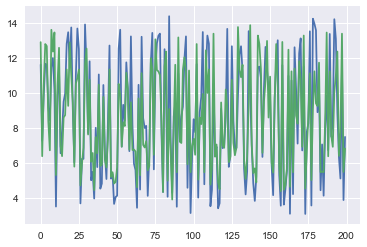

In [101]:
#Comparação das variáveis de teste com as variáveis previstas
plt.plot(yts), plt.plot(yp)